<a href="https://colab.research.google.com/github/shravani201/Bert_Llm_assignment/blob/main/BERT_LLM_22034785.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Classifying Scientific Terms to Enhance Research Efficiency**

In the vast world of scientific research, the sheer volume of information can be overwhelming. Every day, new discoveries, theories, and data are published, making it challenging for researchers to stay updated. By classifying scientific terms using advanced machine learning models like BERT, we can streamline the research process, making it easier for scientists to find relevant information quickly and efficiently. This not only saves time but also accelerates the pace of innovation and discovery.

**Environment Setup And Installing Libraries**

In [ ]:
# Install necessary libraries
!pip install transformers
!pip install torch
!pip install pandas
!pip install scikit-learn
!pip install google-colab


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

**Connecting to Google Drive and Loading Data**

In [ ]:
from google.colab import drive
import pandas as pd

# Mounting Google Drive
drive.mount('/content/drive')

# Loading datasets
train_df = pd.read_csv('/content/drive/MyDrive/bert Dataset/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/bert Dataset/test.csv')




Mounted at /content/drive


In [ ]:
train_df.head()

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


In [ ]:
test_df.head()

,Id,Comment,Topic
0,0x1aa9,Personally I have no idea what my IQ is. I’ve ...,Biology
1,0x25e,I'm skeptical. A heavier lid would be needed t...,Physics
2,0x1248,I think I have 100 cm of books on the subject....,Biology
3,0x2b9,Is chemistry hard in uni. Ive read somewhere t...,Chemistry
4,0x24af,"In addition to the other comment, you can crit...",Physics


In [ ]:
train_df['Topic'].unique()

array(['Biology', 'Physics', 'Chemistry'], dtype=object)

In [ ]:
test_df['Topic'].unique()

array(['Biology', 'Physics', 'Chemistry'], dtype=object)

In [ ]:
train = train_df['Topic'].value_counts()

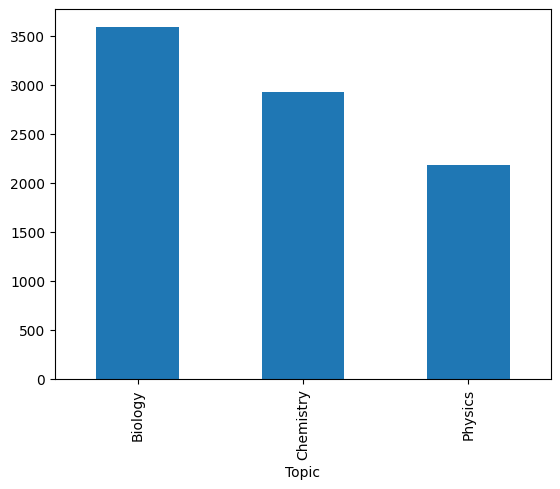

In [ ]:
import matplotlib.pyplot as plt
train.plot(kind='bar')
plt.show()

In [ ]:
test = test_df['Topic'].value_counts()

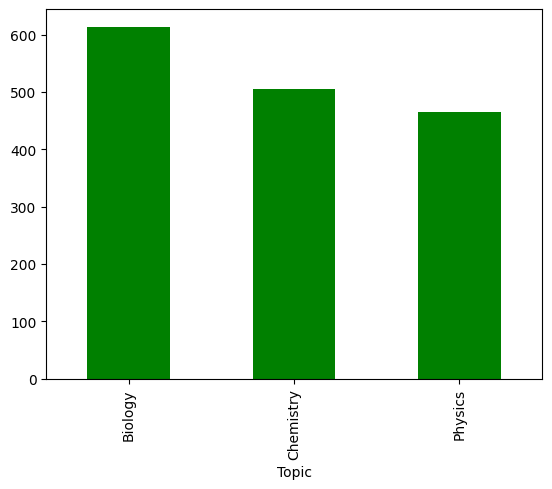

In [ ]:
test.plot(kind='bar', color ='green')
plt.show()

**Preparing BERT Model and Tokenizer** from the Hugging Face library

In this Step:

1. **BertTokenizer** is utilized to tokenize the text data, converting it into a format suitable for BERT.

2. **BertForSequenceClassification** initializes a pre-trained BERT model for sequence classification tasks, specifying that there are three output labels (Physics, Chemistry, Biology).

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer

# Loading the tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Tokenizing the Data**

Data tokenization is performed to convert text into token IDs that the BERT model can process. The **tokenize_data** function takes text data and the tokenizer as inputs, tokenizing the text with padding and truncation to a maximum length of 128 tokens.

In [ ]:
def tokenize_data(data, tokenizer, max_length=128):
    return tokenizer(
        data['Comment'].tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

train_encodings = tokenize_data(train_df, tokenizer)
test_encodings = tokenize_data(test_df, tokenizer)

train_labels = train_df['Topic'].astype('category').cat.codes
test_labels = test_df['Topic'].astype('category').cat.codes


**Creating a Custom** (TextDataset) **Dataset and DataLoader and Training the Model**

In [ ]:
import torch
from torch.utils.data import DataLoader, Dataset

"""
This class takes token encodings and labels as
inputs and returns the length of the dataset and individual items.
DataLoader objects are then created to handle batching and shuffling
of the training and testing datasets.

"""

class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx]).long()
        return item

train_dataset = TextDataset(train_encodings, train_labels)
test_dataset = TextDataset(test_encodings, test_labels)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Move model to device
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Training loop
model.train()
for epoch in range(3):
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} completed")


Epoch 1 completed
Epoch 2 completed
Epoch 3 completed


**Evaluating the Model**

In [ ]:
from sklearn.metrics import classification_report

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

print(classification_report(all_labels, all_preds, target_names=train_df['Topic'].astype('category').cat.categories))


              precision    recall  f1-score   support

     Biology       0.92      0.87      0.90       614
   Chemistry       0.85      0.84      0.84       506
     Physics       0.84      0.90      0.87       466

    accuracy                           0.87      1586
   macro avg       0.87      0.87      0.87      1586
weighted avg       0.87      0.87      0.87      1586



**Fine Tuning Using TrainerAPI**

Fine-tuning the BERT model using the Trainer API simplifies the training process.  The Trainer class is instantiated with the model, training arguments, datasets, and a custom metrics computation function. The training process is initiated by calling trainer.train().

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# to compute metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Load the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# training arguments
training_args = TrainingArguments(
    output_dir='/content/drive/MyDrive/bert Dataset/results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='/content/drive/MyDrive/bert Dataset/logs',
    logging_steps=10,
    eval_strategy="epoch"
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# Train the model
trainer.train()


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,0.657500,0.437454,0.833544,0.836151,0.852958,0.833544
2,0.501700,0.421166,0.866961,0.866583,0.866899,0.866961
3,0.076700,0.615861,0.872636,0.872884,0.874004,0.872636


TrainOutput(global_step=3261, training_loss=0.49307839573422096, metrics={'train_runtime': 1087.1475, 'train_samples_per_second': 23.994, 'train_steps_per_second': 3.0, 'total_flos': 1715828375358720.0, 'train_loss': 0.49307839573422096, 'epoch': 3.0})

**Saving the Model and Tokenizer**

In [ ]:
model.save_pretrained('/content/drive/MyDrive/bert Dataset/saved_model')
tokenizer.save_pretrained('/content/drive/MyDrive/bert Dataset/saved_model')


('/content/drive/MyDrive/bert Dataset/saved_model/tokenizer_config.json',
 '/content/drive/MyDrive/bert Dataset/saved_model/special_tokens_map.json',
 '/content/drive/MyDrive/bert Dataset/saved_model/vocab.txt',
 '/content/drive/MyDrive/bert Dataset/saved_model/added_tokens.json')

## **For Deployment**(Using Visual Studio Code)

In [ ]:
import streamlit as st
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import pandas as pd
import os
import numpy

# Define the model path
model_path = r"C:\Users\Hp Elitebook\Documents\writing tasks\Bert\bert Dataset\saved_model"

# Verify if the model path exists
if not os.path.exists(model_path):
    st.error(f"Model path does not exist: {model_path}")
else:
    st.success(f"Model path found: {model_path}")

    # Load the tokenizer and model
    try:
        tokenizer = BertTokenizer.from_pretrained(model_path)
        model = BertForSequenceClassification.from_pretrained(model_path)
    except OSError as e:
        st.error(f"Error loading model: {e}")
    else:
        # Define the device
        device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
        model.to(device)

        # Load the category mapping
        train_df = pd.read_csv(r"C:\Users\Hp Elitebook\Documents\writing tasks\Bert\bert Dataset\train.csv")
        categories = train_df['Topic'].astype('category').cat.categories

        # Streamlit app
        st.title("Text Classification with BERT")
        st.write("Enter text to classify its topic:")

        # Text input
        user_input = st.text_area("Enter text here:", "")

        if st.button("Classify"):
            if user_input.strip():
                # Tokenize input
                inputs = tokenizer(user_input, return_tensors="pt", padding=True, truncation=True)
                inputs = {key: val.to(device) for key, val in inputs.items()}
                # Predict
                with torch.no_grad():
                    outputs = model(**inputs)
                predictions = torch.argmax(outputs.logits, dim=1)
                topic = categories[predictions.cpu().numpy()[0]]
                st.write(f"Predicted Topic: **{topic}**")
            else:
                st.write("Please enter some text to classify.")


Run the command **streamlit run app.py**